In [16]:
# 1. tensorflow.keras의 dataset에서 fashion_mnist 데이터 준비
# 2. 데이터 확인 ( 이미지 화면에 표시, 데이터 구조 확인 )
# 3. 모델 구조 설계
# 4. 모델 학습 설계
# 5. 학습 실행
# 6. 평가
# 7. 기타 (예측, ...)

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as tf_keras

In [18]:
# 데이터 준비
(X_train, y_train), (X_test, y_test) = tf_keras.datasets.fashion_mnist.load_data()

(60000, 28, 28) (60000,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


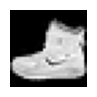

In [19]:
# 데이터 확인

# label_name
# 0 T-shirt/top, 1 Trouser, 2 Pullover, 3 Dress, 4 Coat, 5 Sandal, 6 Shirt, 7 Sneaker, 8 Bag, 9 Ankle boot

print(X_train.shape, y_train.shape)
print(np.unique(y_train, return_counts=True))

plt.figure(figsize=(1, 1))
plt.imshow(X_train[0], cmap='gray')
plt.axis('off')
plt.show()

In [20]:
# 데이터 전처리
flattened_X_train = X_train.reshape(-1, 784) # 2차원 입력을 1차원 입력으로 변경
flattened_X_test = X_test.reshape(-1, 784)

print(flattened_X_train.shape)

(60000, 784)


In [21]:
# 모델 구조 설계

model = tf_keras.models.Sequential()
model.add(tf_keras.layers.Input(shape=(784, )))
model.add(tf_keras.layers.Dense(512, activation='relu'))
model.add(tf_keras.layers.Dense(256, activation='relu'))
model.add(tf_keras.layers.Dense(128, activation='relu'))
model.add(tf_keras.layers.Dense(10, activation='softmax')) # 출력층

In [22]:
# 모델 학습 설계

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [23]:
model.fit(flattened_X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.6795 - loss: 10.7978 - val_accuracy: 0.7809 - val_loss: 0.8717
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.8212 - loss: 0.6142 - val_accuracy: 0.8296 - val_loss: 0.5131
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8488 - loss: 0.4511 - val_accuracy: 0.8463 - val_loss: 0.4715
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8640 - loss: 0.3824 - val_accuracy: 0.8564 - val_loss: 0.4235
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.8720 - loss: 0.3542 - val_accuracy: 0.8422 - val_loss: 0.4552
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.8786 - loss: 0.3337 - val_accuracy: 0.8617 - val_loss: 0.4072
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.8862 - loss: 0.3172 - val_accuracy: 0.8677 - val_loss: 0.3864
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8888 - loss: 0.3017 - val_a

In [24]:
# 모델 평가

model.evaluate(flattened_X_train, y_train), model.evaluate(flattened_X_test, y_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8964 - loss: 0.2767
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8652 - loss: 0.3917


([0.29557979106903076, 0.8917166590690613],
 [0.3956414759159088, 0.8636000156402588])

In [27]:
# 예측 실험

predicted_value = model.predict(flattened_X_test[:1])
print(predicted_value)
print(np.argmax(predicted_value))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[5.9771449e-10 5.4364464e-16 3.0262988e-13 1.1967701e-14 4.3855761e-14
  2.6231084e-05 7.0475340e-12 1.3056253e-02 8.6872565e-11 9.8691750e-01]]
9


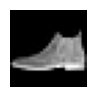

In [28]:
plt.figure(figsize=(1, 1))
plt.imshow(X_test[0], cmap='gray')
plt.axis('off')
plt.show()

In [49]:
# 모델 구조 설계 2

model2 = tf_keras.models.Sequential()
model2.add(tf_keras.layers.Input(shape=(28, 28))),
model2.add(tf_keras.layers.Flatten()), # (28, 28) --> (784, )
model2.add(tf_keras.layers.Dense(512, activation='relu'))
model2.add(tf_keras.layers.Dense(256, activation='relu'))
model2.add(tf_keras.layers.Dense(128, activation='relu'))
model2.add(tf_keras.layers.Dense(10, activation='softmax')) # 출력층

In [52]:
# 모델 학습 설계

model2.compile(loss='sparse_categorical_crossentropy',
               # optimizer='adam',
               optimizer=tf_keras.optimizers.Adam(learning_rate=0.0001),
               metrics=['accuracy'])

In [53]:
# model2.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)
# fit_history = model2.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2) # 학습 로그 반환
fit_history = model2.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2) # 학습 로그 반환

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.6408 - loss: 12.8745 - val_accuracy: 0.7811 - val_loss: 2.0402
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.7969 - loss: 1.6711 - val_accuracy: 0.7885 - val_loss: 1.4882
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8227 - loss: 1.1181 - val_accuracy: 0.8111 - val_loss: 1.1496
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.8422 - loss: 0.8111 - val_accuracy: 0.8117 - val_loss: 1.0255
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8521 - loss: 0.6804 - val_accuracy: 0.8183 - val_loss: 0.9651
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.8675 - loss: 0.5597 - val_accuracy: 0.8250 - val_loss: 0.9063
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8822 - loss: 0.4658 - val_accuracy: 0.8288 - val_loss: 0.8619
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8871 - loss: 0.4156 - val_

In [54]:
# 모델 평가 2

model2.evaluate(X_train, y_train), model2.evaluate(X_test, y_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9440 - loss: 0.1595
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8558 - loss: 0.6634


([0.24310654401779175, 0.9281166791915894],
 [0.6746211647987366, 0.8550000190734863])

In [35]:
model.summary()
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,702,304 (6.49 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,134,870 (4.33 MB)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,702,304 (6.49 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,134,870 (4.33 MB)

In [41]:
# type( fit_history )
print( fit_history.history.keys() )
print( fit_history.epoch )
print( fit_history.params )

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
{'verbose': 'auto', 'epochs': 10, 'steps': 375}


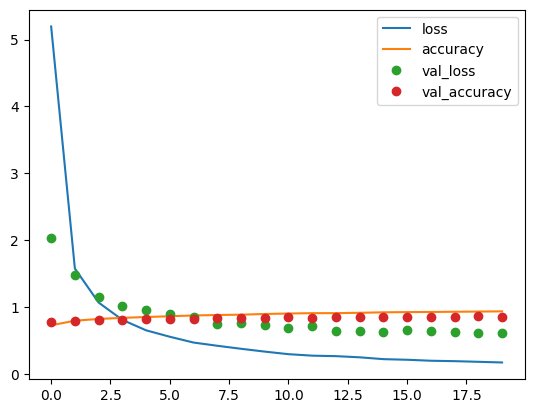

In [55]:
plt.plot(fit_history.epoch, fit_history.history['loss'], label='loss')
plt.plot(fit_history.epoch, fit_history.history['accuracy'], label='accuracy')
plt.plot(fit_history.epoch, fit_history.history['val_loss'], "o", label='val_loss')
plt.plot(fit_history.epoch, fit_history.history['val_accuracy'], "o", label='val_accuracy')
plt.legend()
plt.show()